# Project

Team3: Han Chen / Dylan Connor  


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


* Rating Character Analysis  
Analyze reviews by the same people. Do people tend to only rate high or only rate low? Do people tend to only rate high or low based on type of company? How would ratings affect company rankings if people’s ratings were normalized in some way?

* Geographic Analysis  
Look at statistics for different cities. What types of companies are most heavily reviewed in different regions?

* Check-in Analysis  
What time of the day do people generally check into restaurants? Does this change significantly by the type of restaurant?

* Friends Analysis  
Look at reviewers friend activity. Do people tend to review a business around the same time as friends? Do they review with a similar rating or with different ratings?

* Ratings Text Analysis   
Analyze the text of the reviews for patterns that explain the "funny", "useful" and "cool"


# yelp_business

In [2]:
data = pd.read_csv("input_data/yelp_business.csv")

In [3]:
data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
data.describe(include = "all")

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
count,174567,174567,68015,174567,174566,174566,173944,174566.000000,174566.000000,174567.000000,174567.000000,174567.000000,174567
unique,174567,132619,408,138564,1093,67,16004,NaN,NaN,NaN,NaN,NaN,76419
top,KTzBUAzUfFqvttyjWi_irw,"""Starbucks""",Westside,"""""",Las Vegas,AZ,89109,NaN,NaN,NaN,NaN,NaN,Restaurants;Pizza
freq,1,936,3500,6442,26775,52214,2965,NaN,NaN,NaN,NaN,NaN,990
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.627312,-92.679009,3.632196,30.137059,0.840376,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.389012,26.240079,1.003739,98.208174,0.366258,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.086009,-142.466650,1.000000,3.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.631550,-112.125879,3.000000,4.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.144257,-89.410128,3.500000,8.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.606181,-79.657609,4.500000,23.000000,1.000000,NaN


In [5]:
data['Restaurant'] = np.where(data['categories'].str.match(".*Restaurants.*",case = False), 'Y', 'N')
data.loc[data['categories'].str.match(".*bar;.*",case = False),'Restaurant'] = "Y"
data.loc[data['categories'].str.match(".*coffee.*",case = False),'Restaurant'] = "Y"
data.loc[data['categories'].str.match(".*Hotel.*",case = False),'Restaurant'] = "N"

In [6]:
#data['Restaurant_sub'] = np.where(data['Restaurant'] == "N", "Other", data["categories"].apply(lambda v: v.split(";")[0]))
data['Restaurant_sub'] = np.where(data['Restaurant'] == "N", "Other", "Other - Restaurant")
data.loc[data['categories'].str.match(".*Adult.*",case = False),'Restaurant_sub'] = "Adult"
data.loc[data['categories'].str.match(".*Adult Entertainment.*",case = False),'Restaurant_sub'] = "Adult"
data.loc[data['categories'].str.match(".*Afghan.*",case = False),'Restaurant_sub'] = "Afghan"
data.loc[data['categories'].str.match(".*African.*",case = False),'Restaurant_sub'] = "African"
data.loc[data['categories'].str.match(".*Airport Lounges.*",case = False),'Restaurant_sub'] = "Airport"
data.loc[data['categories'].str.match(".*Airport Shuttles.*",case = False),'Restaurant_sub'] = "Airport"
data.loc[data['categories'].str.match(".*Airport Terminals.*",case = False),'Restaurant_sub'] = "Airport"
data.loc[data['categories'].str.match(".*Airports.*",case = False),'Restaurant_sub'] = "Airport"
data.loc[data['categories'].str.match(".*American (New).*",case = False),'Restaurant_sub'] = "American"
data.loc[data['categories'].str.match(".*American (Traditional).*",case = False),'Restaurant_sub'] = "American"
data.loc[data['categories'].str.match(".*Arabian.*",case = False),'Restaurant_sub'] = "Arabian"
data.loc[data['categories'].str.match(".*Arcades.*",case = False),'Restaurant_sub'] = "Games"
data.loc[data['categories'].str.match(".*Argentine.*",case = False),'Restaurant_sub'] = "Argentine"
data.loc[data['categories'].str.match(".*Armenian.*",case = False),'Restaurant_sub'] = "Armenian"
data.loc[data['categories'].str.match(".*Australian.*",case = False),'Restaurant_sub'] = "Australian"
data.loc[data['categories'].str.match(".*Austrian.*",case = False),'Restaurant_sub'] = "Austrian"
data.loc[data['categories'].str.match(".*Bagels.*",case = False),'Restaurant_sub'] = "Breakfast"
data.loc[data['categories'].str.match(".*Baguettes.*",case = False),'Restaurant_sub'] = "Breakfast"
data.loc[data['categories'].str.match(".*Bakeries.*",case = False),'Restaurant_sub'] = "Dessert"
data.loc[data['categories'].str.match(".*Bangladeshi.*",case = False),'Restaurant_sub'] = "Bangladeshi"
data.loc[data['categories'].str.match(".*Bar Crawl.*",case = False),'Restaurant_sub'] = "Bar"
data.loc[data['categories'].str.match(".*Barbeque.*",case = False),'Restaurant_sub'] = "Barbeque"
data.loc[data['categories'].str.match(".*Bars.*",case = False),'Restaurant_sub'] = "Bar"
data.loc[data['categories'].str.match(".*Basque.*",case = False),'Restaurant_sub'] = "Spanish"
data.loc[data['categories'].str.match(".*Bavarian.*",case = False),'Restaurant_sub'] = "German"
data.loc[data['categories'].str.match(".*Beer.*",case = False),'Restaurant_sub'] = "Beer"
data.loc[data['categories'].str.match(".*Beer Bar.*",case = False),'Restaurant_sub'] = "Beer"
data.loc[data['categories'].str.match(".*Beer Garden.*",case = False),'Restaurant_sub'] = "Beer"
data.loc[data['categories'].str.match(".*Beer Gardens.*",case = False),'Restaurant_sub'] = "Beer"
data.loc[data['categories'].str.match(".*Beer Hall.*",case = False),'Restaurant_sub'] = "Beer"
data.loc[data['categories'].str.match(".*Beer Tours.*",case = False),'Restaurant_sub'] = "Beer"
data.loc[data['categories'].str.match(".*Belgian.*",case = False),'Restaurant_sub'] = "Belgian"
data.loc[data['categories'].str.match(".*Brasseries.*",case = False),'Restaurant_sub'] = "French"
data.loc[data['categories'].str.match(".*Brazilian.*",case = False),'Restaurant_sub'] = "Brazilian"
data.loc[data['categories'].str.match(".*Breakfast & Brunch.*",case = False),'Restaurant_sub'] = "Brunch"
data.loc[data['categories'].str.match(".*Breweries.*",case = False),'Restaurant_sub'] = "Beer"
data.loc[data['categories'].str.match(".*Brewpubs.*",case = False),'Restaurant_sub'] = "Beer"
data.loc[data['categories'].str.match(".*Bubble Tea.*",case = False),'Restaurant_sub'] = "Cafe"
data.loc[data['categories'].str.match(".*Bulgarian.*",case = False),'Restaurant_sub'] = "Bulgarian"
data.loc[data['categories'].str.match(".*Burgers.*",case = False),'Restaurant_sub'] = "Burgers"
data.loc[data['categories'].str.match(".*Burmese.*",case = False),'Restaurant_sub'] = "Burmese"
data.loc[data['categories'].str.match(".*Cafes.*",case = False),'Restaurant_sub'] = "Cafe"
data.loc[data['categories'].str.match(".*Cajun/Creole.*",case = False),'Restaurant_sub'] = "Cajun/Creole"
data.loc[data['categories'].str.match(".*Cambodian.*",case = False),'Restaurant_sub'] = "Cambodian"
data.loc[data['categories'].str.match(".*Canadian (New).*",case = False),'Restaurant_sub'] = "Canadian"
data.loc[data['categories'].str.match(".*Caribbean.*",case = False),'Restaurant_sub'] = "Caribbean"
data.loc[data['categories'].str.match(".*Champagne Bars.*",case = False),'Restaurant_sub'] = "Lounge"
data.loc[data['categories'].str.match(".*Chinese.*",case = False),'Restaurant_sub'] = "Chinese"
data.loc[data['categories'].str.match(".*Cocktail Bars.*",case = False),'Restaurant_sub'] = "Lounge"
data.loc[data['categories'].str.match(".*Coffee & Tea.*",case = False),'Restaurant_sub'] = "Cafe"
data.loc[data['categories'].str.match(".*Coffee & Tea Supplies.*",case = False),'Restaurant_sub'] = "Cafe"
data.loc[data['categories'].str.match(".*Coffee Roasteries.*",case = False),'Restaurant_sub'] = "Cafe"
data.loc[data['categories'].str.match(".*Coffeeshops.*",case = False),'Restaurant_sub'] = "Cafe"
data.loc[data['categories'].str.match(".*Creperies.*",case = False),'Restaurant_sub'] = "French"
data.loc[data['categories'].str.match(".*Cuban.*",case = False),'Restaurant_sub'] = "Cuban"
data.loc[data['categories'].str.match(".*Cupcakes.*",case = False),'Restaurant_sub'] = "Dessert"
data.loc[data['categories'].str.match(".*Czech.*",case = False),'Restaurant_sub'] = "Czech"
data.loc[data['categories'].str.match(".*Czech/Slovakian.*",case = False),'Restaurant_sub'] = "Czech"
data.loc[data['categories'].str.match(".*Dance Clubs.*",case = False),'Restaurant_sub'] = "Club"
data.loc[data['categories'].str.match(".*Delis.*",case = False),'Restaurant_sub'] = "Deli"
data.loc[data['categories'].str.match(".*Dim Sum.*",case = False),'Restaurant_sub'] = "Chinese"
data.loc[data['categories'].str.match(".*Diners.*",case = False),'Restaurant_sub'] = "Diner"
data.loc[data['categories'].str.match(".*Distilleries.*",case = False),'Restaurant_sub'] = "Alcohol"
data.loc[data['categories'].str.match(".*Donuts.*",case = False),'Restaurant_sub'] = "Dessert"
data.loc[data['categories'].str.match(".*Egyptian.*",case = False),'Restaurant_sub'] = "Egyptian"
data.loc[data['categories'].str.match(".*Ethiopian.*",case = False),'Restaurant_sub'] = "Ethiopian"
data.loc[data['categories'].str.match(".*Falafel.*",case = False),'Restaurant_sub'] = "Middle Eastern"
data.loc[data['categories'].str.match(".*Fast Food.*",case = False),'Restaurant_sub'] = "Fast Food"
data.loc[data['categories'].str.match(".*Filipino.*",case = False),'Restaurant_sub'] = "Filipino"
data.loc[data['categories'].str.match(".*Fish & Chips.*",case = False),'Restaurant_sub'] = "English"
data.loc[data['categories'].str.match(".*French.*",case = False),'Restaurant_sub'] = "French"
data.loc[data['categories'].str.match(".*Friterie.*",case = False),'Restaurant_sub'] = "Belgian"
data.loc[data['categories'].str.match(".*Gastropubs.*",case = False),'Restaurant_sub'] = "Bar"
data.loc[data['categories'].str.match(".*Greek.*",case = False),'Restaurant_sub'] = "Greek"
data.loc[data['categories'].str.match(".*Guamanian.*",case = False),'Restaurant_sub'] = "Guamanian"
data.loc[data['categories'].str.match(".*Halal.*",case = False),'Restaurant_sub'] = "Halal"
data.loc[data['categories'].str.match(".*Hawaiian.*",case = False),'Restaurant_sub'] = "Hawaiian"
data.loc[data['categories'].str.match(".*Himalayan/Nepalese.*",case = False),'Restaurant_sub'] = "Himalayan/Nepalese"
data.loc[data['categories'].str.match(".*Hookah Bars.*",case = False),'Restaurant_sub'] = "Lounge"
data.loc[data['categories'].str.match(".*Indian.*",case = False),'Restaurant_sub'] = "Indian"
data.loc[data['categories'].str.match(".*Indonesian.*",case = False),'Restaurant_sub'] = "Indonesian"
data.loc[data['categories'].str.match(".*Irish.*",case = False),'Restaurant_sub'] = "Irish"
data.loc[data['categories'].str.match(".*Irish Pub.*",case = False),'Restaurant_sub'] = "Bar"
data.loc[data['categories'].str.match(".*Island Pub.*",case = False),'Restaurant_sub'] = "Bar"
data.loc[data['categories'].str.match(".*Italian.*",case = False),'Restaurant_sub'] = "Italian"
data.loc[data['categories'].str.match(".*Izakaya.*",case = False),'Restaurant_sub'] = "Japanese"
data.loc[data['categories'].str.match(".*Japanese.*",case = False),'Restaurant_sub'] = "Japanese"
data.loc[data['categories'].str.match(".*Juice Bars & Smoothies.*",case = False),'Restaurant_sub'] = "Drinks"
data.loc[data['categories'].str.match(".*Korean.*",case = False),'Restaurant_sub'] = "Korean"
data.loc[data['categories'].str.match(".*Lebanese.*",case = False),'Restaurant_sub'] = "Lebanese"
data.loc[data['categories'].str.match(".*Mauritius.*",case = False),'Restaurant_sub'] = "Mauritius"
data.loc[data['categories'].str.match(".*Mediterranean.*",case = False),'Restaurant_sub'] = "Mediterranean"
data.loc[data['categories'].str.match(".*Mexican.*",case = False),'Restaurant_sub'] = "Mexican"
data.loc[data['categories'].str.match(".*Middle Eastern.*",case = False),'Restaurant_sub'] = "Middle Eastern"
data.loc[data['categories'].str.match(".*Milkshake Bars.*",case = False),'Restaurant_sub'] = "Drinks"
data.loc[data['categories'].str.match(".*Mongolian.*",case = False),'Restaurant_sub'] = "Mongolian"
data.loc[data['categories'].str.match(".*Moroccan.*",case = False),'Restaurant_sub'] = "Moroccan"
data.loc[data['categories'].str.match(".*Oriental.*",case = False),'Restaurant_sub'] = "Chinese"
data.loc[data['categories'].str.match(".*Pakistani.*",case = False),'Restaurant_sub'] = "Pakistani"
data.loc[data['categories'].str.match(".*Patisserie/Cake Shop.*",case = False),'Restaurant_sub'] = "Dessert"
data.loc[data['categories'].str.match(".*Persian/Iranian.*",case = False),'Restaurant_sub'] = "Persian/Iranian"
data.loc[data['categories'].str.match(".*Peruvian.*",case = False),'Restaurant_sub'] = "Peruvian"
data.loc[data['categories'].str.match(".*Piano Bars.*",case = False),'Restaurant_sub'] = "Bar"
data.loc[data['categories'].str.match(".*Pizza.*",case = False),'Restaurant_sub'] = "Pizza"
data.loc[data['categories'].str.match(".*Polish.*",case = False),'Restaurant_sub'] = "Polish"
data.loc[data['categories'].str.match(".*Portuguese.*",case = False),'Restaurant_sub'] = "Portuguese"
data.loc[data['categories'].str.match(".*Poutineries.*",case = False),'Restaurant_sub'] = "Canadian"
data.loc[data['categories'].str.match(".*Pubs.*",case = False),'Restaurant_sub'] = "Bar"
data.loc[data['categories'].str.match(".*Puerto Rican.*",case = False),'Restaurant_sub'] = "Puerto Rican"
data.loc[data['categories'].str.match(".*Russian.*",case = False),'Restaurant_sub'] = "Russian"
data.loc[data['categories'].str.match(".*Sandwiches.*",case = False),'Restaurant_sub'] = "Deli"
data.loc[data['categories'].str.match(".*Scandinavian.*",case = False),'Restaurant_sub'] = "Scandinavian"
data.loc[data['categories'].str.match(".*Schnitzel.*",case = False),'Restaurant_sub'] = "Schnitzel"
data.loc[data['categories'].str.match(".*Scottish.*",case = False),'Restaurant_sub'] = "Scottish"
data.loc[data['categories'].str.match(".*Senegalese.*",case = False),'Restaurant_sub'] = "Senegalese"
data.loc[data['categories'].str.match(".*Sicilian.*",case = False),'Restaurant_sub'] = "Sicilian"
data.loc[data['categories'].str.match(".*Singaporean.*",case = False),'Restaurant_sub'] = "Singaporean"
data.loc[data['categories'].str.match(".*Spanish.*",case = False),'Restaurant_sub'] = "Spanish"
data.loc[data['categories'].str.match(".*Speakeasies.*",case = False),'Restaurant_sub'] = "Speakeasies"
data.loc[data['categories'].str.match(".*Sports Bars.*",case = False),'Restaurant_sub'] = "Bar"
data.loc[data['categories'].str.match(".*Sri Lankan.*",case = False),'Restaurant_sub'] = "Sri Lankan"
data.loc[data['categories'].str.match(".*Steakhouses.*",case = False),'Restaurant_sub'] = "Steakhouses"
data.loc[data['categories'].str.match(".*Strip Clubs.*",case = False),'Restaurant_sub'] = "Adult"
data.loc[data['categories'].str.match(".*Sushi Bars.*",case = False),'Restaurant_sub'] = "Sushi Bars"
data.loc[data['categories'].str.match(".*Syrian.*",case = False),'Restaurant_sub'] = "Syrian"
data.loc[data['categories'].str.match(".*Szechuan.*",case = False),'Restaurant_sub'] = "Szechuan"
data.loc[data['categories'].str.match(".*Taiwanese.*",case = False),'Restaurant_sub'] = "Taiwanese"
data.loc[data['categories'].str.match(".*Tapas Bars.*",case = False),'Restaurant_sub'] = "Tapas"
data.loc[data['categories'].str.match(".*Tapas/Small Plates.*",case = False),'Restaurant_sub'] = "Tapas"
data.loc[data['categories'].str.match(".*Tea Rooms.*",case = False),'Restaurant_sub'] = "Cafe"
data.loc[data['categories'].str.match(".*Tex-Mex.*",case = False),'Restaurant_sub'] = "Tex-Mex"
data.loc[data['categories'].str.match(".*Thai.*",case = False),'Restaurant_sub'] = "Thai"
data.loc[data['categories'].str.match(".*Traditional Norwegian.*",case = False),'Restaurant_sub'] = "Norwegian"
data.loc[data['categories'].str.match(".*Trinidadian.*",case = False),'Restaurant_sub'] = "Trinidadian"
data.loc[data['categories'].str.match(".*Turkish.*",case = False),'Restaurant_sub'] = "Turkish"
data.loc[data['categories'].str.match(".*Tuscan.*",case = False),'Restaurant_sub'] = "Tuscan"
data.loc[data['categories'].str.match(".*Ukrainian.*",case = False),'Restaurant_sub'] = "Ukrainian"
data.loc[data['categories'].str.match(".*Uzbek.*",case = False),'Restaurant_sub'] = "Uzbek"
data.loc[data['categories'].str.match(".*Vegan.*",case = False),'Restaurant_sub'] = "Vegan"
data.loc[data['categories'].str.match(".*Vegetarian.*",case = False),'Restaurant_sub'] = "Vegetarian"
data.loc[data['categories'].str.match(".*Venezuelan.*",case = False),'Restaurant_sub'] = "Venezuelan"
data.loc[data['categories'].str.match(".*Whiskey Bars.*",case = False),'Restaurant_sub'] = "Lounge"
data.loc[data['categories'].str.match(".*Wine Bars.*",case = False),'Restaurant_sub'] = "Lounge"
data.loc[data['categories'].str.match(".*Bowling.*",case = False),'Restaurant_sub'] = "Game"
data.loc[data['categories'].str.match(".*Escape Games.*",case = False),'Restaurant_sub'] = "Game"
data.loc[data['categories'].str.match(".*Laser Tag.*",case = False),'Restaurant_sub'] = "Game"
data.loc[data['categories'].str.match(".*Tabletop Games.*",case = False),'Restaurant_sub'] = "Game"


In [7]:
data.loc[data['Restaurant']=="Y"].head(5)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Restaurant,Restaurant_sub
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,Y,Deli
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants,Y,Italian
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food,Y,Cafe
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...,Y,Deli
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional),Y,Other - Restaurant


In [8]:
data["Restaurant"].value_counts()

N    116903
Y     57664
Name: Restaurant, dtype: int64

In [9]:
res = data.loc[data['Restaurant']=="Y"]

In [10]:
cats = ';'.join(i+ ";" for i in res['categories'])
cats = list(set(cats.split(";")))
cats[0:10]

['',
 'Pubs',
 'Drive-Thru Bars',
 'Bubble Tea',
 'Wholesalers',
 'Brewing Supplies',
 'Hot Tub & Pool',
 'Sushi Bars',
 'General Dentistry',
 'Trainers']

In [11]:
res['Restaurant_sub'].value_counts().head(10)

Deli                  6432
Other - Restaurant    5063
Cafe                  5036
Pizza                 4761
Bar                   3558
Fast Food             3496
Mexican               3286
Chinese               2820
Italian               1927
Sushi Bars            1796
Name: Restaurant_sub, dtype: int64

Text(0.5,1,'Count of Restaurants by State')

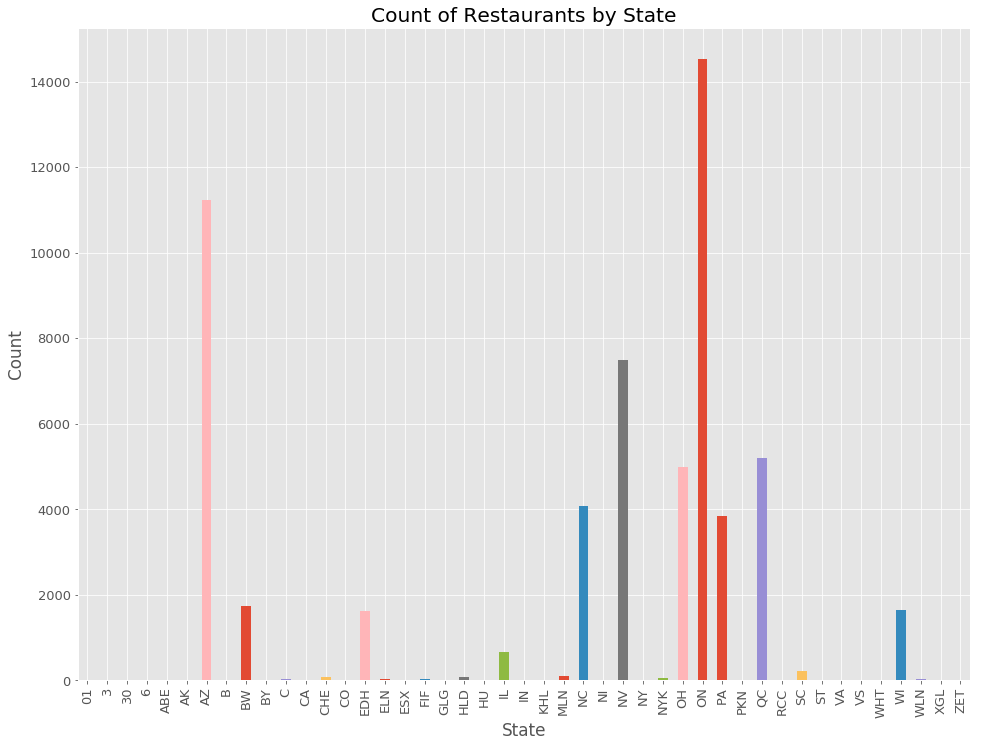

In [49]:
plt.style.use('ggplot')

plt.rcParams.update({'font.size': 14})
plt.pyplot.figure(figsize = (16,12))
plt.pyplot.grid()
plt.pyplot.xlabel("State")
plt.pyplot.ylabel("Count")
plt.pyplot.tick_params(axis='both', which='major', labelsize=13)
plt.pyplot.tick_params(axis='both', which='minor', labelsize=13)
res['state'].value_counts().sort_index().plot.bar()
plt.pyplot.title("Count of Restaurants by State")

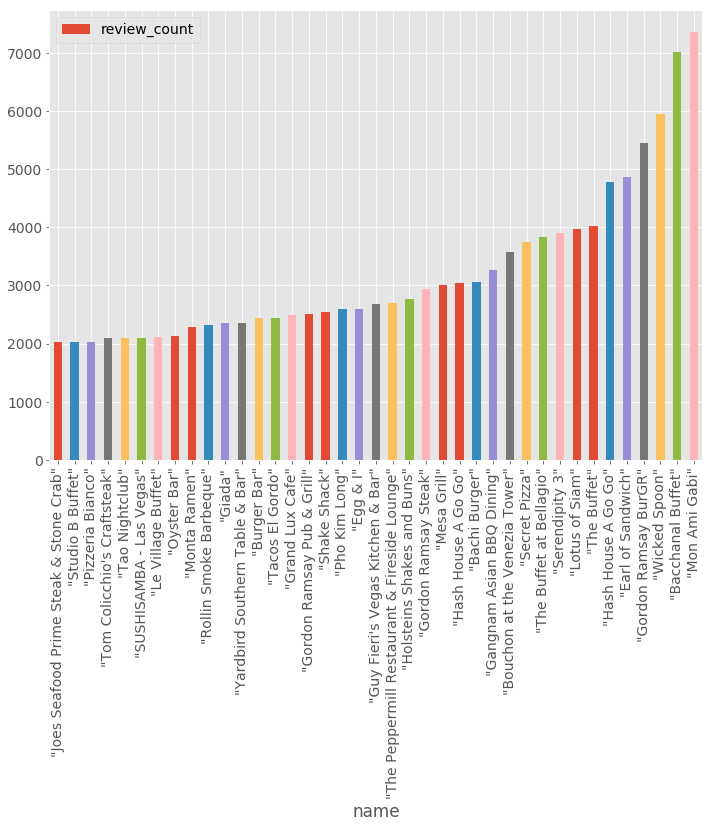

In [50]:
plt.pyplot.figure(figsize = (14,10))

g = (res.loc[res['review_count']>2000,['name','review_count','stars']].sort_values(by='review_count'))

fig, ax = plt.pyplot.subplots()
fig.set_size_inches(11.7, 8.27)
g.plot.bar(x = 'name', y = 'review_count', ax = ax)

#plt.pyplot.bar(x = 'name', height = 'review_count', data = g.sort_values(by="review_count"))
#plt.pyplot.xticks(rotation=90);

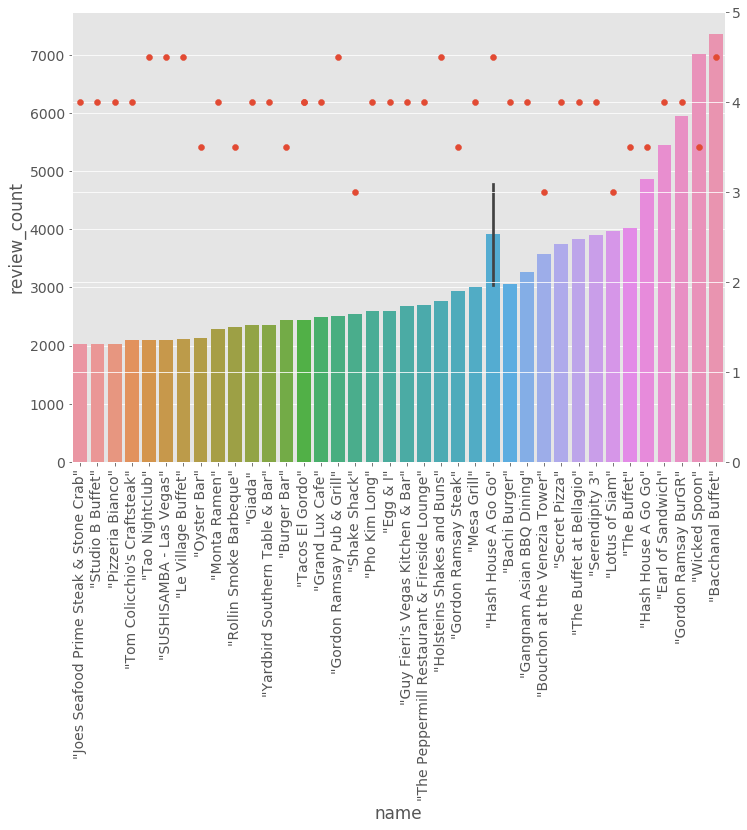

In [51]:
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(11.7, 8.27)

gg = sns.barplot(x = 'name', y = 'review_count', data = g, ax =ax)
ax2 =ax.twinx()

ax2.scatter(x = g['name'], y = g['stars'])
ax2.set_ylim(0, 5)
gg.set_xticklabels(labels = g['name'], rotation=90);

In [12]:
res.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Restaurant,Restaurant_sub
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,Y,Deli
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants,Y,Italian
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food,Y,Cafe
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...,Y,Deli
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional),Y,Other - Restaurant


In [82]:
res.to_csv("output_data/res_data.csv")

# yelp_checkin.csv

In [27]:
checkin = pd.read_csv("input_data/yelp_checkin.csv")

In [28]:
checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [30]:
#checkin['hour_clean'] = pd.to_datetime(checkin['hour'], infer_datetime_format=True)
checkin['hour_clean'] = checkin['hour'].apply(lambda v : int(str(v).replace(":00", "")))


In [31]:
checkin['hour_clean'].head()

0     0
1     0
2    14
3    19
4    17
Name: hour_clean, dtype: int64

In [32]:
checkin.describe(include= 'all')

,business_id,weekday,hour,checkins,hour_clean
count,3911218,3911218,3911218,3.911218e+06,3.911218e+06
unique,146350,7,24,NaN,NaN
top,Nzk07R8GUXtfzkmqikhCCA,Sat,23:00,NaN,NaN
freq,168,653551,284353,NaN,NaN
mean,NaN,NaN,NaN,4.256566e+00,1.332629e+01
std,NaN,NaN,NaN,1.393120e+01,7.989804e+00
min,NaN,NaN,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,1.000000e+00,4.000000e+00
50%,NaN,NaN,NaN,2.000000e+00,1.600000e+01
75%,NaN,NaN,NaN,3.000000e+00,2.000000e+01


In [33]:
combine = pd.merge(checkin, data)
combine.head()

,business_id,weekday,hour,checkins,hour_clean,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Restaurant,Restaurant_sub
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12,0,"""Waldo's BBQ""",NaN,"""4500 E Main St""",Mesa,AZ,85205,33.415858,-111.732411,4.0,270,1,Sandwiches;Restaurants;Event Planning & Servic...,Y,Deli
1,3Mc-LxcqeguOXOVT_2ZtCg,Tue,1:00,10,1,"""Waldo's BBQ""",NaN,"""4500 E Main St""",Mesa,AZ,85205,33.415858,-111.732411,4.0,270,1,Sandwiches;Restaurants;Event Planning & Servic...,Y,Deli
2,3Mc-LxcqeguOXOVT_2ZtCg,Mon,20:00,9,20,"""Waldo's BBQ""",NaN,"""4500 E Main St""",Mesa,AZ,85205,33.415858,-111.732411,4.0,270,1,Sandwiches;Restaurants;Event Planning & Servic...,Y,Deli
3,3Mc-LxcqeguOXOVT_2ZtCg,Sun,22:00,11,22,"""Waldo's BBQ""",NaN,"""4500 E Main St""",Mesa,AZ,85205,33.415858,-111.732411,4.0,270,1,Sandwiches;Restaurants;Event Planning & Servic...,Y,Deli
4,3Mc-LxcqeguOXOVT_2ZtCg,Wed,1:00,13,1,"""Waldo's BBQ""",NaN,"""4500 E Main St""",Mesa,AZ,85205,33.415858,-111.732411,4.0,270,1,Sandwiches;Restaurants;Event Planning & Servic...,Y,Deli


In [34]:
combine.describe(include = 'all')

,business_id,weekday,hour,checkins,hour_clean,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Restaurant,Restaurant_sub
count,3911218,3911218,3911218,3.911218e+06,3.911218e+06,3911218,1766894,3911218,3911202,3911217,3905983,3.911212e+06,3.911212e+06,3.911218e+06,3.911218e+06,3.911218e+06,3911218,3911218,3911218
unique,146350,7,24,NaN,NaN,107307,402,118672,998,59,14256,NaN,NaN,NaN,NaN,NaN,65591,2,95
top,Nzk07R8GUXtfzkmqikhCCA,Sat,23:00,NaN,NaN,"""Starbucks""",The Strip,"""""",Las Vegas,AZ,89109,NaN,NaN,NaN,NaN,NaN,Food;Coffee & Tea,Y,Other
freq,168,653551,284353,NaN,NaN,63845,158477,22415,907753,1183534,158242,NaN,NaN,NaN,NaN,NaN,49257,2021709,1646927
mean,NaN,NaN,NaN,4.256566e+00,1.332629e+01,NaN,NaN,NaN,NaN,NaN,NaN,3.772524e+01,-9.824920e+01,3.570477e+00,9.581007e+01,8.541590e-01,NaN,NaN,NaN
std,NaN,NaN,NaN,1.393120e+01,7.989804e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.637825e+00,2.102970e+01,7.789123e-01,2.253829e+02,3.529468e-01,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,-3.608601e+01,-1.424666e+02,1.000000e+00,3.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,4.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.362590e+01,-1.150821e+02,3.000000e+00,1.300000e+01,1.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.000000e+00,1.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,3.610885e+01,-1.119000e+02,3.500000e+00,3.600000e+01,1.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000e+00,2.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,4.146303e+01,-8.068614e+01,4.000000e+00,9.300000e+01,1.000000e+00,NaN,NaN,NaN


In [36]:
combine.loc[combine['business_id']=='BnpuVvPy3sfLlkqKCx6Xnw'].head()

,business_id,weekday,hour,checkins,hour_clean,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Restaurant,Restaurant_sub
695996,BnpuVvPy3sfLlkqKCx6Xnw,Sat,15:00,10,15,"""Grand Cafe""",South Summerlin,"""11011 W Charleston Blvd""",Las Vegas,NV,89135,36.1564,-115.333556,2.5,329,1,Restaurants;Wine Bars;Nightlife;Cafes;Breakfas...,Y,Lounge
695997,BnpuVvPy3sfLlkqKCx6Xnw,Sat,7:00,13,7,"""Grand Cafe""",South Summerlin,"""11011 W Charleston Blvd""",Las Vegas,NV,89135,36.1564,-115.333556,2.5,329,1,Restaurants;Wine Bars;Nightlife;Cafes;Breakfas...,Y,Lounge
695998,BnpuVvPy3sfLlkqKCx6Xnw,Tue,13:00,5,13,"""Grand Cafe""",South Summerlin,"""11011 W Charleston Blvd""",Las Vegas,NV,89135,36.1564,-115.333556,2.5,329,1,Restaurants;Wine Bars;Nightlife;Cafes;Breakfas...,Y,Lounge
695999,BnpuVvPy3sfLlkqKCx6Xnw,Sun,19:00,25,19,"""Grand Cafe""",South Summerlin,"""11011 W Charleston Blvd""",Las Vegas,NV,89135,36.1564,-115.333556,2.5,329,1,Restaurants;Wine Bars;Nightlife;Cafes;Breakfas...,Y,Lounge
696000,BnpuVvPy3sfLlkqKCx6Xnw,Mon,10:00,9,10,"""Grand Cafe""",South Summerlin,"""11011 W Charleston Blvd""",Las Vegas,NV,89135,36.1564,-115.333556,2.5,329,1,Restaurants;Wine Bars;Nightlife;Cafes;Breakfas...,Y,Lounge


In [37]:
pvt = combine.loc[combine['Restaurant']=='Y'].pivot_table(index='hour_clean', columns='weekday', 
                       values='checkins', aggfunc = lambda sr: sum(sr),margins = False)
                       #margins_name = 'Total')


In [38]:
pvt

weekday,Fri,Mon,Sat,Sun,Thu,Tue,Wed
hour_clean,,,,,,,
0,106311,104811,146452,149035,101080,86853,96353
1,122694,109678,171018,164754,115793,99123,109949
2,114178,97161,167507,160614,106850,91718,101553
3,85018,72567,133016,131184,77123,66773,73936
4,54212,46405,91535,93628,47516,41916,45325
5,32090,27669,57759,61515,24848,24091,25492
6,19074,16326,36776,39740,14584,13823,14795
7,12889,11287,24633,26666,10002,9206,9473
8,8661,7336,16044,17395,6570,5890,6034


In [39]:
pvt2 = pvt.unstack().reset_index()
pvt2 = pvt2.rename(index=str, columns={0: "Checkins"})
pvt2


,weekday,hour_clean,Checkins
0,Fri,0,106311
1,Fri,1,122694
2,Fri,2,114178
3,Fri,3,85018
4,Fri,4,54212
5,Fri,5,32090
6,Fri,6,19074
7,Fri,7,12889
8,Fri,8,8661
9,Fri,9,5767


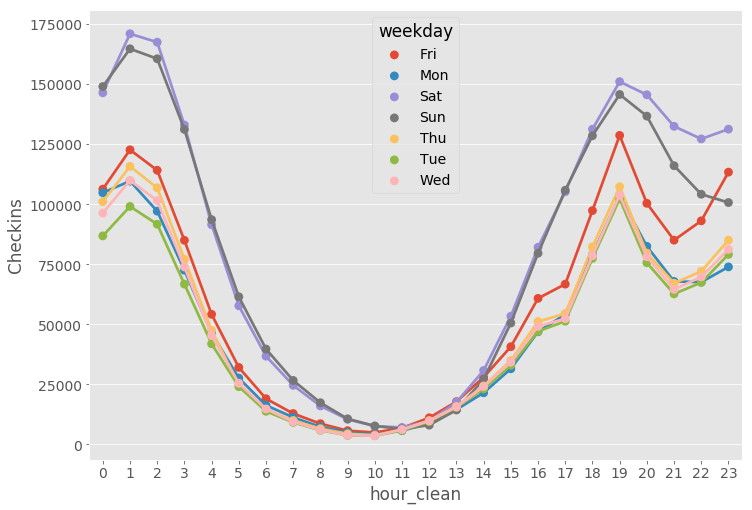

In [40]:
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(11.7, 8.27)

sns.pointplot(data = pvt2, x = "hour_clean", y = "Checkins", hue ="weekday", ax = ax)

In [76]:
grp = combine.groupby(['Restaurant', 'weekday', 'hour_clean']).apply(lambda df : sum(df["checkins"])).unstack().unstack().unstack().reset_index()
grp = grp.rename(index=str, columns={0: "Checkins"})
grp.head()

,hour_clean,weekday,Restaurant,Checkins
0,0,Fri,N,72355
1,0,Fri,Y,106311
2,0,Mon,N,58525
3,0,Mon,Y,104811
4,0,Sat,N,77973


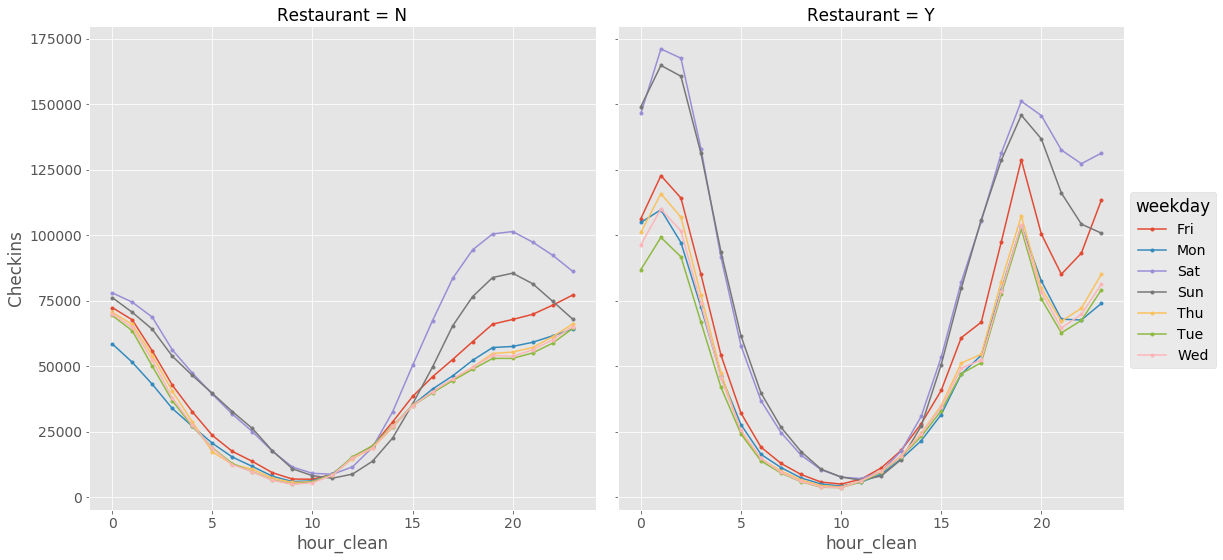

In [42]:
#fig, ax = plt.pyplot.subplots()
#fig.set_size_inches(11.7, 8.27)


g = sns.FacetGrid(grp, col="Restaurant", col_wrap=2, size=8, aspect = 1, hue = "weekday")
g = g.map(plt.pyplot.plot, "hour_clean", "Checkins", marker=".").add_legend()

#sns.pointplot(data = grp, x = "hour_clean", y = "Checkins", hue ="weekday", ax = ax)

In [78]:
grp2 = combine.groupby(['Restaurant', 'Restaurant_sub', 'weekday', 'hour_clean']).apply(lambda df : sum(df["checkins"])).unstack().unstack().unstack().unstack().reset_index()
grp2 = grp2.rename(index=str, columns={0: "Checkins"})
grp2.head()

,hour_clean,weekday,Restaurant_sub,Restaurant,Checkins
0,0,Fri,Adult,N,271.0
1,0,Fri,Adult,Y,10.0
2,0,Fri,Afghan,N,NaN
3,0,Fri,Afghan,Y,27.0
4,0,Fri,African,N,NaN


In [79]:
grp2.to_csv("output_data/checkins.csv")

# yelp_review.csv

In [52]:
reviews  = pd.read_csv("input_data/yelp_review.csv")

In [53]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [54]:
reviews = reviews.drop(labels = "review_id", axis = 1)

In [55]:
reviews = pd.merge(reviews,
                   res[['business_id','Restaurant']],
                   left_on = 'business_id',
                   right_on = 'business_id',
                   how = 'inner')

In [56]:
res_rev = reviews.loc[reviews['Restaurant']=="Y"]

In [57]:
len(res_rev.loc[res_rev['useful']>0, ['useful']])

1458532

In [58]:
len(res_rev.loc[res_rev['funny']>0, ['funny']])

680319

In [59]:
len(res_rev.loc[res_rev['cool']>0, ['cool']])

850749

In [60]:
useful_text = ' '.join(i+ " " for i in res_rev.loc[((res_rev['useful']>0) & (res_rev['funny']==0) & (res_rev['cool']==0)) ,'text'])
funny_text = ' '.join(i+ " " for i in res_rev.loc[((res_rev['useful']==0) & (res_rev['funny']>0) & (res_rev['cool']==0)),'text'])
cool_text = ' '.join(i+ " " for i in res_rev.loc[((res_rev['useful']==0) & (res_rev['funny']==0) & (res_rev['cool']>0)),'text'])


In [61]:
useful_text1 = useful_text[0:1000000]
funny_text1 = funny_text[0:1000000]
cool_text1 = cool_text[0:1000000]

In [62]:
from collections import Counter
from operator import itemgetter
import spacy
nlp = spacy.load('en')

In [63]:
parsed_text1 = nlp(useful_text1)
parsed_text2 = nlp(funny_text1)
parsed_text3 = nlp(cool_text1)

In [64]:
import re

histogram_with_some_filtering1 = Counter()
for token in parsed_text1:
    if re.match('[a-zA-Z]+$', token.lemma_) and not (token.is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
        lemma = token.lemma_
        histogram_with_some_filtering1[lemma] += 1

sorted_lemma_count_pairs = sorted(histogram_with_some_filtering1.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for lemma, count in sorted_lemma_count_pairs[:10]:
    print(lemma, ":", count)

the : 1894
be : 1603
not : 1538
good : 1507
place : 1079
food : 988
order : 784
like : 752
come : 727
meat : 639


In [65]:
histogram_with_some_filtering2 = Counter()
for token in parsed_text2:
    if re.match('[a-zA-Z]+$', token.lemma_) and not (token.is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
        lemma = token.lemma_
        histogram_with_some_filtering2[lemma] += 1

sorted_lemma_count_pairs = sorted(histogram_with_some_filtering2.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for lemma, count in sorted_lemma_count_pairs[:10]:
    print(lemma, ":", count)

the : 1778
not : 1733
be : 1415
food : 1380
good : 1309
place : 1104
order : 920
like : 795
come : 749
time : 651


In [66]:
histogram_with_some_filtering3 = Counter()
for token in parsed_text3:
    if re.match('[a-zA-Z]+$', token.lemma_) and not (token.is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
        lemma = token.lemma_
        histogram_with_some_filtering3[lemma] += 1

sorted_lemma_count_pairs = sorted(histogram_with_some_filtering3.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for lemma, count in sorted_lemma_count_pairs[:10]:
    print(lemma, ":", count)

the : 1974
good : 1708
not : 1341
be : 1340
food : 1267
place : 1222
great : 828
order : 791
come : 771
time : 693


In [67]:
keys = set(list(histogram_with_some_filtering1.keys()) + list(histogram_with_some_filtering2.keys())+ list(histogram_with_some_filtering3.keys()))

In [68]:
word_counts = []
for key in keys:
    word_counts.append([key, histogram_with_some_filtering1.get(key),histogram_with_some_filtering2.get(key),histogram_with_some_filtering3.get(key)])  
word_counts = pd.DataFrame(word_counts, columns = ["word","useful", "funny", "cool"])
word_counts.fillna(0, inplace = True)
word_counts.head()
word_counts["total"] = word_counts["useful"] + word_counts["funny"] + word_counts["cool"]
word_counts["useful_per"] = word_counts["useful"] / word_counts["total"]
word_counts["funny_per"] = word_counts["funny"] / word_counts["total"]
word_counts["cool_per"] = word_counts["cool"] / word_counts["total"]
word_counts.head()

,word,useful,funny,cool,total,useful_per,funny_per,cool_per
0,limo,0.0,3.0,7.0,10.0,0.000000,0.300000,0.700000
1,phat,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000
2,bizarre,2.0,2.0,0.0,4.0,0.500000,0.500000,0.000000
3,mai,11.0,3.0,23.0,37.0,0.297297,0.081081,0.621622
4,pinnacle,0.0,0.0,1.0,1.0,0.000000,0.000000,1.000000


In [100]:
threshhold = .7
unique = word_counts.loc[((word_counts["total"]>10) & ((word_counts['useful_per'] > threshhold) | (word_counts['funny_per'] >threshhold) | (word_counts['cool_per'] >threshhold)))]

In [101]:
unique.head()

,word,useful,funny,cool,total,useful_per,funny_per,cool_per
102,decently,1.0,1.0,10.0,12.0,0.083333,0.083333,0.833333
123,tan,14.0,0.0,0.0,14.0,1.000000,0.000000,0.000000
214,nasty,0.0,20.0,3.0,23.0,0.000000,0.869565,0.130435
343,opening,15.0,3.0,3.0,21.0,0.714286,0.142857,0.142857
409,confit,17.0,5.0,2.0,24.0,0.708333,0.208333,0.083333


In [102]:
unique['Category'] = unique[['useful_per','funny_per','cool_per']].apply(lambda s : ("Useful" if s['useful_per']>.75 else ("Funny" if s['funny_per']>.75 else "Cool")) , axis = 1)

C:\Users\dmcph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
unique['Max Count'] = unique[['useful','funny','cool']].apply(lambda r : max(r['useful'],r['funny'],r['cool']), axis = 1)
unique.head()

C:\Users\dmcph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,word,useful,funny,cool,total,useful_per,funny_per,cool_per,Category,Max Count
102,decently,1.0,1.0,10.0,12.0,0.083333,0.083333,0.833333,Cool,10.0
123,tan,14.0,0.0,0.0,14.0,1.000000,0.000000,0.000000,Useful,14.0
214,nasty,0.0,20.0,3.0,23.0,0.000000,0.869565,0.130435,Funny,20.0
343,opening,15.0,3.0,3.0,21.0,0.714286,0.142857,0.142857,Cool,15.0
409,confit,17.0,5.0,2.0,24.0,0.708333,0.208333,0.083333,Cool,17.0


In [104]:
unique.to_csv("output_data/useful_cool_funny.csv")

In [105]:
word_cloud = []
counts = [int(i) for i in unique['Max Count'].values]
category = unique['Category'].values
word = unique['word'].values
for i,j in enumerate(counts):
    for k in range(j):
        word_cloud.append([word[i],category[i]])


In [106]:
word_cloud[0:3] 

[['decently', 'Cool'], ['decently', 'Cool'], ['decently', 'Cool']]

In [107]:
word_cloud = pd.DataFrame(word_cloud, columns = ["word","category"])

In [108]:
word_cloud.head()

,word,category
0,decently,Cool
1,decently,Cool
2,decently,Cool
3,decently,Cool
4,decently,Cool


In [109]:
word_cloud.to_csv("output_data/word_cloud.csv")

In [110]:
data.loc[data['business_id']=="El4FC8jcawUVgw_0EIcbaQ"]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Restaurant,Restaurant_sub
10567,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...,N,Other


In [114]:
res_rev.loc[((res_rev['text'].str.match(".*banh.*",case = False)) & (res_rev['funny']==0) & (res_rev['useful']==0) & (res_rev['cool']>0) & (res_rev['Restaurant'] == 'Y'))].head() #, 'text'].values 

,user_id,business_id,stars,date,text,useful,funny,cool,Restaurant
6117,Ux1as9FUJM4yHdBkNjVxiA,N93EYZy9R0sdlEvubu94ig,5,2015-03-31,I can't eat Banh Mi anywhere else. I am Vietna...,0,0,2,Y
6207,9Xuu5iywtnPhREZbOyr63A,N93EYZy9R0sdlEvubu94ig,5,2015-04-18,Thinking about this place makes me so sad. The...,0,0,1,Y
6243,OJiZwMbp23WL-H5wnPRkrw,N93EYZy9R0sdlEvubu94ig,4,2017-08-07,"The reviews don't lie, such a great Banh Mi, r...",0,0,1,Y
6303,lM9vXZgUd6DaW12cNoT2fw,N93EYZy9R0sdlEvubu94ig,5,2012-07-24,Is banh mi the next TO food fad? If it can all...,0,0,1,Y
6318,-up8qu8zsgvVmP3LR9RSaA,N93EYZy9R0sdlEvubu94ig,5,2013-05-23,"Same quality every single time, which is aweso...",0,0,1,Y


In [115]:
res_rev.loc[((res_rev['text'].str.match(".*receipt.*",case = False)) & (res_rev['funny']>0) & (res_rev['useful']==0) & (res_rev['cool']==0) & (res_rev['Restaurant'] == 'Y'))].head() #, 'text'].values 

,user_id,business_id,stars,date,text,useful,funny,cool,Restaurant
23634,9z8jGHimbdno4SJGG_3esA,So132GP_uy3XbGs0KNyzyw,4,2016-10-26,I loved this place! It was my favorite part of...,0,1,0,Y
34450,iO71kL4mkIYB_9TexWga_w,CHW_DPKnTqudyRaDa4vwkg,1,2017-08-15,McDickulous. Can't even understand the lady on...,0,2,0,Y
40094,acH7cB0kD2EpUm5SmhnfgA,BuFYIRXZNc0Ti-JSQ-QdvA,1,2015-06-16,I decided to get my family some quick lunch an...,0,1,0,Y
40208,KZL3i6mKCOKSgHLz7IEENQ,5jTmjxb1X34EfcY1gos4tw,1,2016-05-12,NEVER AGAIN. Walked in with my boyfriend and d...,0,1,0,Y
43777,puOgFpzzBEgQtkxuSYy9jg,6Vyp-9i1jzwK_bvisuPJpQ,1,2015-07-14,"no idea how the food tastes, cuz i paid and wa...",0,1,0,Y


In [113]:
res_rev.loc[((res_rev['text'].str.match(".*izakaya.*",case = False)) & (res_rev['funny']==0) & (res_rev['useful']==0) & (res_rev['cool']>0) & (res_rev['Restaurant'] == 'Y'))].head() #, 'text'].values 

,user_id,business_id,stars,date,text,useful,funny,cool,Restaurant
1261,1ZFOZV7zA-6yZFZWoZSwxA,RtUvSWO_UZ8V3Wpj0n077w,3,2015-12-19,"I am from NYC, so there's no shortage of Izaka...",0,0,1,Y
1295,T7HARIckQKdHF4tEl9iepA,RtUvSWO_UZ8V3Wpj0n077w,4,2013-10-14,Guu Izakaya constantly has a great atmosphere ...,0,0,1,Y
2242,fNTYCCz1cjLBTNMu7zNTXA,RtUvSWO_UZ8V3Wpj0n077w,5,2011-02-24,I love this place. Most authentic Japanese Iza...,0,0,1,Y
2297,JmMXYQJio5eXgOvVZl_xGw,RtUvSWO_UZ8V3Wpj0n077w,4,2013-01-19,4 out of 5! Great izakaya place. Fun atmospher...,0,0,1,Y
250146,izdAXYjPdwaztxuT6C7GvQ,wzugmCevnXuCMCF4upAf0w,5,2016-06-20,I like Kazu for that asian fusion food. I pref...,0,0,1,Y
